In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
train=pd.read_csv("winequality-red.csv",sep=";")
print(train.describe())
print(train)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [5]:
print(train.apply(lambda x: sum(x.isnull()),axis=0))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


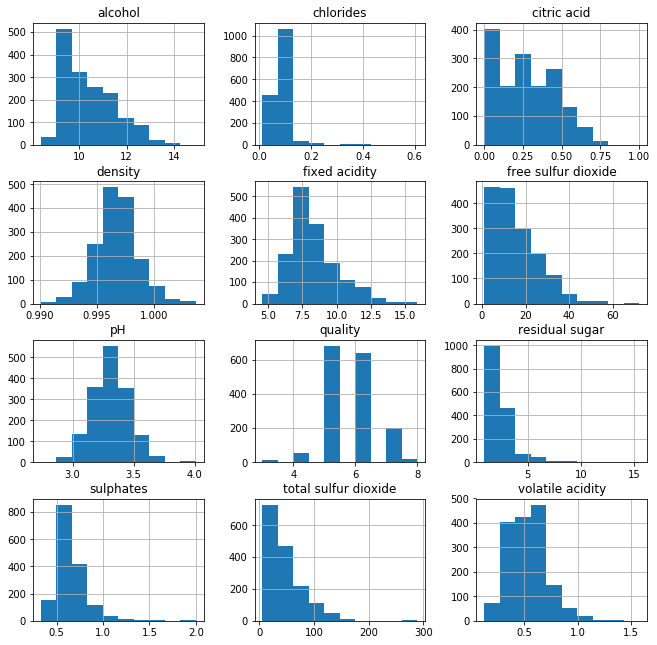

In [6]:
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")].index.values].hist(figsize=[11,11])
plt.show()

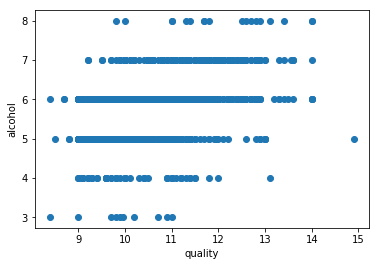

In [7]:
plt.scatter(train["alcohol"],train["quality"])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

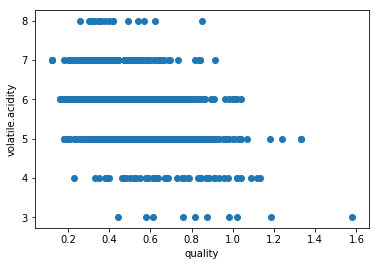

In [8]:
plt.scatter(train["volatile acidity"],train["quality"])
plt.xlabel("quality")
plt.ylabel("volatile.acidity")
plt.show()

In [9]:
def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0

train['tasty'] = train['quality'].apply(isTasty)
print(train['tasty'].value_counts())



0    1382
1     217
Name: tasty, dtype: int64


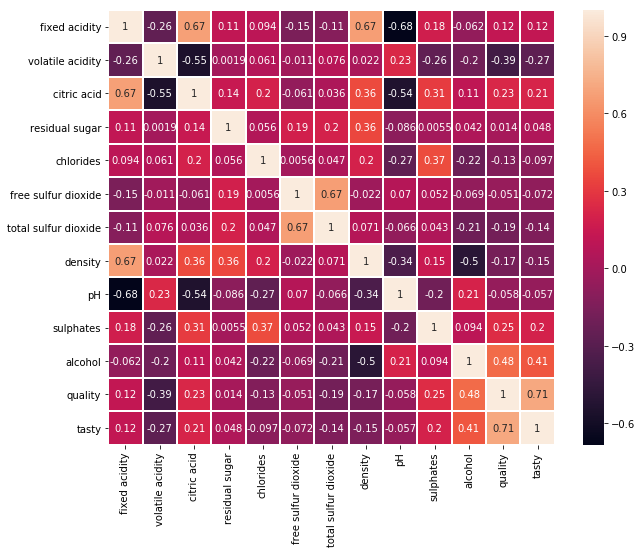

In [10]:
import seaborn as sns
corr=train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,linewidths=1,annot=True)
plt.show()

In [11]:
data = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = train['quality']

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn. cross_validation import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.33,random_state=123)
model = LinearRegression()
model.fit(data_train, target_train)
y_predictions = model.predict(data_test)
print ('R-squared:',model.score(data_test, target_test))
scores = cross_val_score(model,data_test,target_test, cv=5)
print(scores.mean(), scores)

R-squared: 0.345925023781
0.306130943097 [ 0.40174694  0.38719775  0.25373517  0.14859225  0.3393826 ]


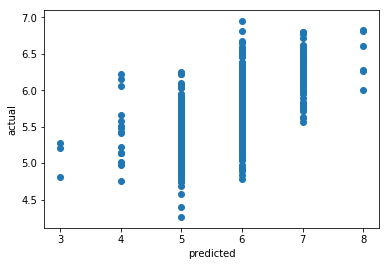

In [19]:
plt.scatter(target_test,y_predictions)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()